In [1]:
import pandas as pd
import os

In [2]:
prado = pd.read_csv('/content/prado-museum-pictures/prado.csv')

In [3]:
len(prado)

13487

# Process supports

Drop na

In [4]:
prado = prado.dropna(subset=['technical_sheet_soporte'])

Aggregate the paper, canvas and wood supported workarts

In [5]:
prado.loc[:,'technical_sheet_soporte'] = prado.loc[:,'technical_sheet_soporte'].apply(lambda x: 'Papel' if x.startswith('Papel') else x)
prado.loc[:,'technical_sheet_soporte'] = prado.loc[:,'technical_sheet_soporte'].apply(lambda x: 'Lienzo' if x.startswith('Lienzo') else x)
prado.loc[:,'technical_sheet_soporte'] = prado.loc[:,'technical_sheet_soporte'].apply(lambda x: 'Tabla' if x.startswith('Tabla') else x)

In [6]:
prado.technical_sheet_soporte.value_counts().sort_values(ascending=False)[:10]

technical_sheet_soporte
Papel                                      6434
Lienzo                                     3355
Tabla                                       733
Marfil                                      149
Placa de vidrio                             127
Lámina de cobre                              82
Revestimiento mural trasladado a lienzo      44
Tejido                                       16
Cartón                                       14
Terciopelo                                   12
Name: count, dtype: int64

Filter to keep the three most frequent supports and then undersample to balance the dataset

In [7]:
# Filter the dataframe to keep only the first three supports
filtered_prado = prado[prado['technical_sheet_soporte'].isin(['Papel', 'Tabla', 'Lienzo'])]

# Calculate smaller frequency 
min_occurrences = filtered_prado.groupby('technical_sheet_soporte')['technical_sheet_soporte'].count().min()

# Undersample each support to the minimum count
undersampled_prado = filtered_prado.groupby('technical_sheet_soporte').apply(lambda x: x.sample(min_occurrences)).reset_index(drop=True)

C:\Users\leoac\AppData\Local\Temp\ipykernel_14108\2860821152.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_prado = filtered_prado.groupby('technical_sheet_soporte').apply(lambda x: x.sample(min_occurrences)).reset_index(drop=True)


Plot the number of samples

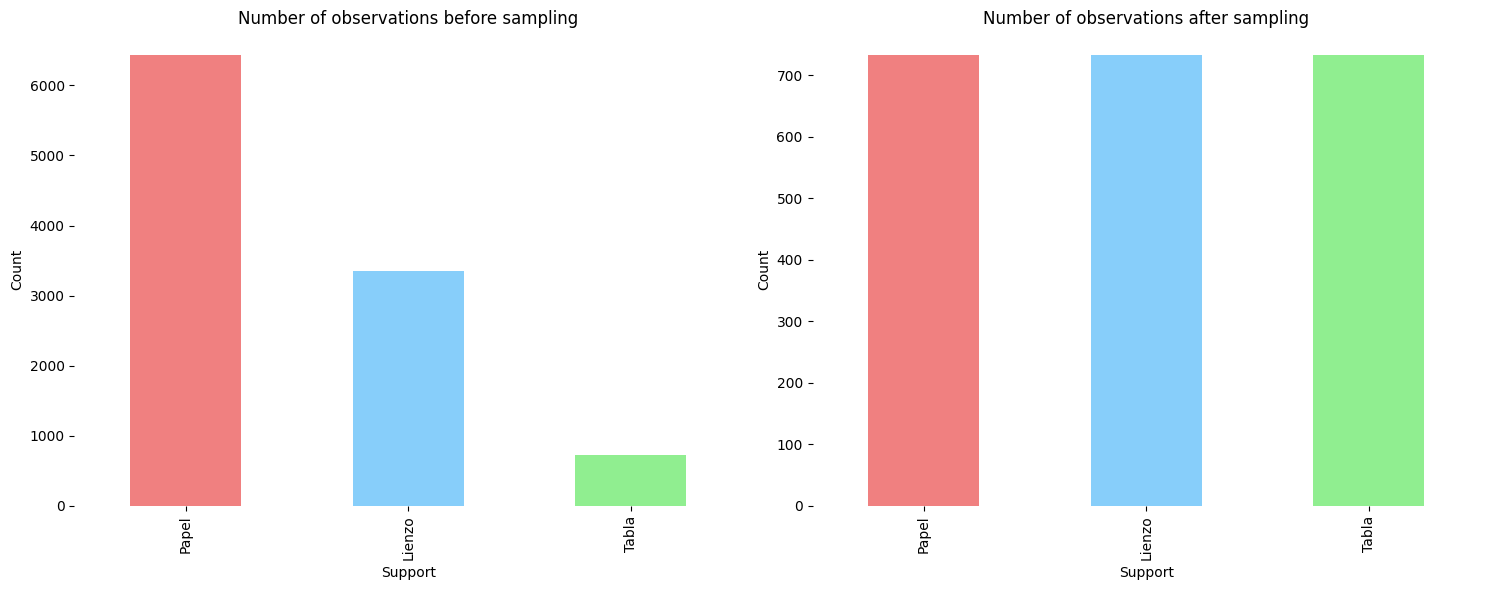

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_prado is your filtered DataFrame
# Count the number of observations for each class
counts_before = filtered_prado['technical_sheet_soporte'].value_counts().sort_values(ascending=False)

# Define the counts after sampling (each class has 733 samples)
classes = ['Papel', 'Lienzo', 'Tabla']
counts_after = pd.Series([733, 733, 733], index=classes)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the counts before sampling
counts_before.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightskyblue', 'lightgreen'])
axes[0].set_title('Number of observations before sampling')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Support')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)

# Plot the counts after sampling
counts_after.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightskyblue', 'lightgreen'])
axes[1].set_title('Number of observations after sampling')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Support')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

# Create the dataset

Create a column for matching the filenames

In [7]:
undersampled_prado['image_file_name'] = undersampled_prado.work_image_url.apply(lambda x: os.path.basename(x))
undersampled_prado['image_file_name']

0       6e75a517-5ab1-452e-8cb4-56afd43ea8c4.jpg
1       d64f2ef2-4669-497b-a5d9-3a177c1ac153.jpg
2       cb1c2e88-a985-49ca-9219-b37a3cae3ec8.jpg
3       28df07d1-6a3a-4484-b56d-ef595c48ab2d.jpg
4       697b51bf-3def-445e-a8da-889da9fe7d4a.jpg
                          ...                   
2194    ce7ae023-062e-45c5-bd22-eb3364823b39.jpg
2195    6387f2cb-0b59-4024-a9ec-6c0099035ac1.jpg
2196    347a300b-5f5f-45c4-a51f-5b692661e8b8.jpg
2197    ef85fe08-c2f3-4738-85e4-0313e7c9538d.jpg
2198    082350dd-29fb-4ec0-94c8-78287a78051c.jpg
Name: image_file_name, Length: 2199, dtype: object

Rename the support column and create the ultimate df with only filename and support type

In [8]:
undersampled_prado.rename({'technical_sheet_soporte': 'support'}, axis=1, inplace=True)
processed_prado = undersampled_prado[['image_file_name', 'support']]

In [9]:
f'{len(processed_prado)} images in the processed dataset'

'2199 images in the processed dataset'

Save a .feather file

In [10]:
processed_prado.to_feather('processed_prado.feather')